# Data Analysis Case Study - Apply Problem Solving Strategy

**Problem**
Assume you are in the role of an Analyst in the product development of the company. To help increase the volume of orders and customers purchasing movie tickets online, you need to analyze data of customers' booking history over the past years. From there, provide informative insights about customer behavior and corresponding recommendations.

This is a capstone project I completed for self-learning Python for Data Analysis, utilizing industry-standard libraries: Pandas and Matplotlib.
There are many frameworks for data analysis. Framework provides a structured and systemetic approach for managing and analyzing data tasks/projects to ensure consistency, efficiency, and high quality work. The framework I used is: 

Problem Definition => Data Collection => Data Transformation => Data Exploration => Sharing Insights

# I. Define The Problem 
**Why?**
- The objective of this task is to analyze user behavior in purchasing movie tickets over the past four years using data.
- By gaining this understanding, we can develop insights to implement effective strategies to increase sales and the number of buyers in the coming years.

**Who?**
- Internal: Departments and/or staffs involves in ticket purchasing process? Sales, customer service
- External: Who is our customers?
-  Location: which city/province/area
-  Profile: new customer, old customer, activated customer,..
-  Demographic: gender (male/femail), education, marriage or not,..

**What?**
- Analyze ticket purchasing behavior using website and mobile app

**Which**
Which element or factor  does customers use duing online ticket purchasing process?
-- Product: tickets
-- Device: phone, website
-- Payment options: cash, card, bank transfer, e-wallet 
-- Price
-- Promotion / Discount

**When**
When do customers often buy tickets?
- Year, month, day, hour
- Holiday, event, new movie

**How**
How did customers use the product?
- Customer experience: Good, bad
++ Feedback
++ %Successful ticket purchases
++ %Customer retention
- Purchasing process
++ Total time completing ticket purchase
++ Time taken for each step in the process. Any bottle-necks? Any step that customer faced frustration?

# II. Disaggregate The Problem
Based on the problem definition, we can create a Logic Tree

## 1. Load Data

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [252]:
df_customer = pd.read_csv("D:/Git DucD Data/SQLplaygroundDataAnalysis/Capstone project/Dataset/customer.csv")
df_campaign = pd.read_csv("D:/Git DucD Data/SQLplaygroundDataAnalysis/Capstone project/Dataset/campaign.csv")
df_device = pd.read_csv("D:/Git DucD Data/SQLplaygroundDataAnalysis/Capstone project/Dataset/device_detail.csv")
df_sales = pd.read_csv("D:/Git DucD Data/SQLplaygroundDataAnalysis/Capstone project/Dataset/sales.csv")
df_status = pd.read_csv("D:/Git DucD Data/SQLplaygroundDataAnalysis/Capstone project/Dataset/status_detail.csv")
df_ticket = pd.read_csv("D:/Git DucD Data/SQLplaygroundDataAnalysis/Capstone project/Dataset/ticket_history.csv")

## 2. Clean Data

### 2.1 Data type, NULL value, duplicate values**

In [253]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52054 entries, 0 to 52053
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     52054 non-null  int64 
 1   usergender  52054 non-null  int64 
 2   dob         52054 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


In [254]:
#CUSTOMER table
#convert DOB type to datetime from object type
import datetime
df_customer['dob'] = pd.to_datetime(df_customer['dob'])

In [255]:
#to check duplicate, we unique count records and compare with the total record number
df_customer.nunique()

user_id       52054
usergender        3
dob            9115
dtype: int64

In [256]:
#CAMPAIGN table
df_campaign.info()
df_campaign.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_code  105 non-null    int64 
 1   campaign_type  105 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


campaign_code    105
campaign_type      3
dtype: int64

In [257]:
#DEVICE table
df_device.info()

#from the result, we can see some null numbers in model 55519 comparing to other columns
#before making decision on how to handle we need to check %null value on total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55639 entries, 0 to 55638
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  55637 non-null  object
 1   model      55519 non-null  object
 2   platform   55639 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [258]:
def calc_null_rate(df):
    """check NULL rate of each column
    """
    newdf = df.isnull().sum().to_frame('null count')
    newdf [['null rate']] = newdf[['null count']] / len(df)
    return newdf.sort_values(by=['null rate'], ascending=False)



In [259]:
#calculate null and null rate
calc_null_rate(df_device)

,null count,null rate
model,120,0.002157
device_id,2,0.000036
platform,0,0.000000


In [ ]:
#[Duc note] for data analysis, delete 2 records that have null value has minor impact of our analysis.
#change NULL value in model to unknown string
df_device = df_device.fillna({'model' : 'unknown'})

#delete 2 NULL records in devicemodel
df_device = df_device[df_device['device_id'].notna()]

calc_null_rate(df_device)

,null count,null rate
device_id,0,0.0
model,0,0.0
platform,0,0.0


In [261]:
#STATUS table
df_status
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   status_id    8 non-null      int64 
 1   status_name  8 non-null      object
 2   description  8 non-null      object
 3   error_group  7 non-null      object
dtypes: int64(1), object(3)
memory usage: 388.0+ bytes


In [262]:
#TICKET HISTORY table (fact)
#[Duc] as it's a fact table - transaction records, we need to review more throughly
df_ticket
df_ticket.info()
df_ticket.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67522 entries, 0 to 67521
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ticket_id          67522 non-null  object 
 1   customer_id        67522 non-null  int64  
 2   paying_method      67522 non-null  object 
 3   theater_name       67522 non-null  float64
 4   device_id          67522 non-null  object 
 5   original_price     67522 non-null  float64
 6   discount_value     67522 non-null  float64
 7   final_price        67522 non-null  float64
 8   time               67522 non-null  object 
 9   status_id          67522 non-null  int64  
 10  mkt_campaign_code  67522 non-null  int64  
 11  movie_name         67522 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 6.2+ MB


,ticket_id,customer_id,paying_method,theater_name,device_id,original_price,discount_value,final_price,time,status_id,mkt_campaign_code,movie_name
0,9f2da3491b42b7599065ac102bdcb4c2,100004,credit card,33.0,3cac5d2e2eb76525aecea5c2ab46b3d9,4.54,1.28,3.26,2019-11-16 13:28:24.970,1,25690,The Grand Grandmaster
1,8607fe9d2d12e14d711c49ae1204de29,118325,credit card,20.0,9d6100d117d5f0aa65fc29b6d9edd9f7,3.09,0.00,3.09,2019-11-13 18:12:03.260,1,0,The Grand Grandmaster
2,3b6145254e74306bfa15e359ee325512,115177,bank account,113.0,684bdc0b76a40607030c561c67dc2345,9.07,2.56,6.51,2019-11-17 11:35:33.195,1,25690,The Grand Grandmaster
3,882a93bb56d6b2005c55216e6f4b64e2,116901,bank account,53.0,603473a9b300a100206c4183eb11a63f,12.78,2.56,10.22,2019-11-07 22:16:34.600,1,25680,The Grand Grandmaster
4,f3eb7c056b38244d23eed5e4cb019a44,135362,credit card,103.0,bcdee3b6e86f8bbd99a0026e28359e48,12.37,0.00,12.37,2019-11-06 22:02:55.425,1,0,The Grand Grandmaster


In [263]:
#Time table is in object/text. It should be time
df_ticket['time'] = pd.to_datetime(df_ticket['time'])

In [264]:
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67522 entries, 0 to 67521
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ticket_id          67522 non-null  object        
 1   customer_id        67522 non-null  int64         
 2   paying_method      67522 non-null  object        
 3   theater_name       67522 non-null  float64       
 4   device_id          67522 non-null  object        
 5   original_price     67522 non-null  float64       
 6   discount_value     67522 non-null  float64       
 7   final_price        67522 non-null  float64       
 8   time               67522 non-null  datetime64[ns]
 9   status_id          67522 non-null  int64         
 10  mkt_campaign_code  67522 non-null  int64         
 11  movie_name         67522 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 6.2+ MB


In [265]:
calc_null_rate(df_ticket)

,null count,null rate
ticket_id,0,0.0
customer_id,0,0.0
paying_method,0,0.0
theater_name,0,0.0
device_id,0,0.0
original_price,0,0.0
discount_value,0,0.0
final_price,0,0.0
time,0,0.0
status_id,0,0.0


In [266]:
df_ticket.nunique()
#total records: 67522 ; there are duplicate records

ticket_id            67515
customer_id          50512
paying_method            4
theater_name           114
device_id            53352
original_price        1003
discount_value         176
final_price           1438
time                 67515
status_id                8
mkt_campaign_code      103
movie_name             316
dtype: int64

In [267]:
#check duplicate
df_dup = df_ticket[df_ticket.duplicated(keep=False)]

df_dup

,ticket_id,customer_id,paying_method,theater_name,device_id,original_price,discount_value,final_price,time,status_id,mkt_campaign_code,movie_name
24027,de40b1921df46e455e426a6dac047d4d,105710,balance,95.0,2df2d3e16931fe66f8626a7778dfde9b,4.54,0.0,4.54,2019-12-23 10:47:42.317,1,0,Dreamy Eyes
24028,de40b1921df46e455e426a6dac047d4d,105710,balance,95.0,2df2d3e16931fe66f8626a7778dfde9b,4.54,0.0,4.54,2019-12-23 10:47:42.317,1,0,Dreamy Eyes
24111,763e20c9c1136c5c06d9a960fac9dae6,143762,credit card,17.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.0,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
24112,763e20c9c1136c5c06d9a960fac9dae6,143762,credit card,17.0,ba5794fca2cba47fd0141dd3fb195934,7.42,0.0,7.42,2019-12-23 15:28:45.738,1,0,Dreamy Eyes
24139,a6062e2443611f0d65727c5469fe89a2,109678,bank account,53.0,7f38dbd65e6c83116f7dd7a7cbe5bf16,9.07,0.0,9.07,2019-12-23 17:15:52.991,1,0,Dreamy Eyes
24140,a6062e2443611f0d65727c5469fe89a2,109678,bank account,53.0,7f38dbd65e6c83116f7dd7a7cbe5bf16,9.07,0.0,9.07,2019-12-23 17:15:52.991,1,0,Dreamy Eyes
24189,d0559f718b50247ad965767ea9be3ab3,131072,balance,112.0,0b667fb51d16c8a931b92e17084304f6,5.36,0.0,5.36,2019-12-23 23:15:06.060,1,0,Dreamy Eyes
24190,d0559f718b50247ad965767ea9be3ab3,131072,balance,112.0,0b667fb51d16c8a931b92e17084304f6,5.36,0.0,5.36,2019-12-23 23:15:06.060,1,0,Dreamy Eyes
24422,2cdf7de498105664abbd91bc30bb4438,100194,bank account,113.0,769e0ddeac9b9d84ac49c2588b537900,7.42,0.0,7.42,2019-12-23 17:33:03.167,1,0,Dreamy Eyes
24423,2cdf7de498105664abbd91bc30bb4438,100194,bank account,113.0,769e0ddeac9b9d84ac49c2588b537900,7.42,0.0,7.42,2019-12-23 17:33:03.167,1,0,Dreamy Eyes


In [268]:
#We have records that have the same information ??
df_ticket.drop_duplicates(inplace=True) #remove duplicate. default keep the first one. inplace true to modify the original data frame


In [269]:
df_ticket.nunique()
df_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67515 entries, 0 to 67521
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ticket_id          67515 non-null  object        
 1   customer_id        67515 non-null  int64         
 2   paying_method      67515 non-null  object        
 3   theater_name       67515 non-null  float64       
 4   device_id          67515 non-null  object        
 5   original_price     67515 non-null  float64       
 6   discount_value     67515 non-null  float64       
 7   final_price        67515 non-null  float64       
 8   time               67515 non-null  datetime64[ns]
 9   status_id          67515 non-null  int64         
 10  mkt_campaign_code  67515 non-null  int64         
 11  movie_name         67515 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 6.7+ MB


### 2.2 Join tables

In [270]:
#[Duc]join all table to give us a systematic view of all our data instead of silo tables
print(df_join_campaign.columns)
print(df_device.columns)

#from tickets we join with the other tables
df_join_customer = pd.merge(df_ticket, df_customer, how = 'left',  left_on='customer_id', right_on='user_id')
df_join_campaign = pd.merge(df_join_customer, df_campaign, how = 'left', left_on='mkt_campaign_code', right_on='campaign_code')
df_join_status = pd.merge(df_join_campaign, df_status, how = 'left', on='status_id')
df_join_all = pd.merge(df_join_status, df_device, how = 'left', on='device_id')

Index(['ticket_id', 'customer_id', 'paying_method', 'theater_name',
       'device_id', 'original_price', 'discount_value', 'final_price', 'time',
       'status_id', 'mkt_campaign_code', 'movie_name', 'user_id', 'usergender',
       'dob', 'campaign_code', 'campaign_type'],
      dtype='object')
Index(['device_id', 'model', 'platform'], dtype='object')


In [271]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_id,original_price,discount_value,final_price,time,status_id,...,user_id,usergender,dob,campaign_code,campaign_type,status_name,description,error_group,model,platform
0,9f2da3491b42b7599065ac102bdcb4c2,100004,credit card,33.0,3cac5d2e2eb76525aecea5c2ab46b3d9,4.54,1.28,3.26,2019-11-16 13:28:24.970,1,...,100004,1,1989-02-25,25690.0,direct discount,SUCCESS,Transaction successful,NaN,"iPhone10,2",mobile
1,8607fe9d2d12e14d711c49ae1204de29,118325,credit card,20.0,9d6100d117d5f0aa65fc29b6d9edd9f7,3.09,0.00,3.09,2019-11-13 18:12:03.260,1,...,118325,2,1992-10-03,NaN,NaN,SUCCESS,Transaction successful,NaN,"iPhone10,6",mobile


In [272]:
calc_null_rate(df_join_all)

,null count,null rate
error_group,57746,0.834528
campaign_code,33711,0.487181
campaign_type,33711,0.487181
model,178,0.002572
platform,178,0.002572
ticket_id,0,0.000000
original_price,0,0.000000
device_id,0,0.000000
theater_name,0,0.000000
paying_method,0,0.000000


**Analysis:**
Looking at the attributes that have NULL, 
- error_group: We can ignore 'error_group' because it identifies if a records belong to any error_group. The transactions succeeded, and they had no errors.
- campaign_code: Some orders were completed without discount campaign. Hence, the campaign_code & campaign_type are empty.
- campaign_type: Same as the above.
- model: Some orders could not find device_id & platform. The reason is unknown. However, the null rate is very low (~0.002) which won't have big impact in our calculation. We can map to unknown for tracking later.
- platform: Same as the above.


In [273]:
df_join_all[df_join_all['error_group'].isnull()]

,ticket_id,customer_id,paying_method,theater_name,device_id,original_price,discount_value,final_price,time,status_id,...,user_id,usergender,dob,campaign_code,campaign_type,status_name,description,error_group,model,platform
0,9f2da3491b42b7599065ac102bdcb4c2,100004,credit card,33.0,3cac5d2e2eb76525aecea5c2ab46b3d9,4.54,1.28,3.26,2019-11-16 13:28:24.970,1,...,100004,1,1989-02-25,25690.0,direct discount,SUCCESS,Transaction successful,NaN,"iPhone10,2",mobile
1,8607fe9d2d12e14d711c49ae1204de29,118325,credit card,20.0,9d6100d117d5f0aa65fc29b6d9edd9f7,3.09,0.00,3.09,2019-11-13 18:12:03.260,1,...,118325,2,1992-10-03,NaN,NaN,SUCCESS,Transaction successful,NaN,"iPhone10,6",mobile
2,3b6145254e74306bfa15e359ee325512,115177,bank account,113.0,684bdc0b76a40607030c561c67dc2345,9.07,2.56,6.51,2019-11-17 11:35:33.195,1,...,115177,2,1997-07-01,25690.0,direct discount,SUCCESS,Transaction successful,NaN,"iPhone7,2",mobile
3,882a93bb56d6b2005c55216e6f4b64e2,116901,bank account,53.0,603473a9b300a100206c4183eb11a63f,12.78,2.56,10.22,2019-11-07 22:16:34.600,1,...,116901,2,1996-01-06,25680.0,direct discount,SUCCESS,Transaction successful,NaN,"iPhone10,4",mobile
4,f3eb7c056b38244d23eed5e4cb019a44,135362,credit card,103.0,bcdee3b6e86f8bbd99a0026e28359e48,12.37,0.00,12.37,2019-11-06 22:02:55.425,1,...,135362,1,1989-05-03,NaN,NaN,SUCCESS,Transaction successful,NaN,"iPhone12,5",mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69191,822a4b093b79bc8f01e3f4428376a847,118559,debit card,43.0,ffc912a5245c4c7cda887879d39d1edd,10.31,3.79,6.52,2020-03-08 21:01:04.872,1,...,118559,1,1970-01-01,33100.0,direct discount,SUCCESS,Transaction successful,NaN,"iPhone10,4",mobile
69192,fda2a0dbc302a132ab2a890511f64921,118783,debit card,83.0,61c5a41ee0201400edaeb3b5e8a9cd84,10.72,4.21,6.51,2020-02-22 08:54:05.422,1,...,118783,1,2002-05-26,33100.0,direct discount,SUCCESS,Transaction successful,NaN,Samsung SM-G975F,mobile
69193,cd01413c6a2b85ecf0e0083393fbddfc,121610,credit card,43.0,0ca2218c16df3af9f95f190717047cc3,12.37,0.00,12.37,2020-02-28 08:16:42.213,1,...,121610,1,1991-10-01,NaN,NaN,SUCCESS,Transaction successful,NaN,"iPhone12,3",mobile
69194,311f201448bbadfaf229f0457fd3652a,125872,balance,104.0,509f3a9ff38b8566cff3e03955a08c7e,10.68,0.00,10.68,2020-02-21 18:34:40.420,1,...,125872,1,1994-07-29,NaN,NaN,SUCCESS,Transaction successful,NaN,"iPhone11,6",mobile


In [274]:
#replace null with unknown text to prevent errors
df_join_all = df_join_all.fillna('unknown')

In [275]:
calc_null_rate(df_join_all)

,null count,null rate
ticket_id,0,0.0
customer_id,0,0.0
paying_method,0,0.0
theater_name,0,0.0
device_id,0,0.0
original_price,0,0.0
discount_value,0,0.0
final_price,0,0.0
time,0,0.0
status_id,0,0.0


### 2.3 View all values  of each column

In [276]:
df_join_all.nunique().sort_values(ascending=False)

ticket_id            67515
time                 67515
device_id            53352
customer_id          50512
user_id              50512
dob                   9000
final_price           1438
model                 1216
original_price        1003
movie_name             316
discount_value         176
theater_name           114
campaign_code          103
mkt_campaign_code      103
description              8
status_id                8
status_name              8
paying_method            4
error_group              4
campaign_type            4
usergender               3
platform                 3
dtype: int64

In [277]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_id,original_price,discount_value,final_price,time,status_id,...,user_id,usergender,dob,campaign_code,campaign_type,status_name,description,error_group,model,platform
0,9f2da3491b42b7599065ac102bdcb4c2,100004,credit card,33.0,3cac5d2e2eb76525aecea5c2ab46b3d9,4.54,1.28,3.26,2019-11-16 13:28:24.970,1,...,100004,1,1989-02-25,25690.0,direct discount,SUCCESS,Transaction successful,unknown,"iPhone10,2",mobile
1,8607fe9d2d12e14d711c49ae1204de29,118325,credit card,20.0,9d6100d117d5f0aa65fc29b6d9edd9f7,3.09,0.00,3.09,2019-11-13 18:12:03.260,1,...,118325,2,1992-10-03,unknown,unknown,SUCCESS,Transaction successful,unknown,"iPhone10,6",mobile


In [278]:
df_join_all.theater_name.unique()


array([ 33.,  20., 113.,  53., 103.,  81.,  76.,  77.,  34.,  16.,   7.,
        87.,  57.,   8.,  74.,  50.,  42.,  75.,  51.,  49.,  83.,  67.,
        66.,  43.,  61.,  64.,  11.,   9.,  19.,  52.,  60.,  47.,  90.,
        98.,   6.,  95.,  96.,  78.,  35.,  46.,  27., 104.,  17.,  94.,
         3.,  70.,  91.,  36.,  63.,  56.,  39.,  84.,  44.,  32.,  10.,
       112.,  13.,  80.,  55.,  14.,  31.,  12.,  54.,  85., 109.,  18.,
        37.,  93., 102., 110., 100., 108.,  45.,  29.,  79., 106., 101.,
        24., 107.,  72.,   2., 105.,  59.,  21.,  38.,  48.,  25.,  73.,
        62.,  41.,  40.,   4.,  26.,  88.,  65.,  28.,  69.,  30.,  15.,
        89.,  71.,  92., 111.,  99.,  82.,   5., 114.,  86.,  97.,  23.,
       115.,  22.,  58.,  68.])

**Analysis** The names of the theaters are in ID. Missing theaters table. Also, the data type should be int not float

In [279]:
df_join_all['theater_name'] = df_join_all['theater_name'].astype(int)

In [280]:
#List out values of the table
specific_cols = ['description', 'status_name', 'paying_method', 'error_group', 'campaign_type', 'usergender', 'platform']
for cols in specific_cols:
    print(cols + ' : ', df_join_all[cols].unique().astype(str))
    print('-------------------------')


description :  ['Transaction successful'
 'Insufficient funds in customer account. Please add more funds and try the transaction again.'
 'Payment failed' 'An error occurred. Please try again later.'
 'Password locked due to multiple incorrect attempts. Choose Forgot Password to unlock.'
 'Payment overdue' 'Transaction temporarily limited'
 'Please KYC to proceed with transactions']
-------------------------
status_name :  ['SUCCESS' 'LOW_BALANCE' 'FAILED_CHARGE' 'INVALID_BANK'
 'WRONG_PIN_EXCEEDED' 'INVALID_TIME' 'TRANSACTION_LIMITED'
 'KYC_REQUIRED_USER']
-------------------------
paying_method :  ['credit card' 'bank account' 'debit card' 'balance']
-------------------------
error_group :  ['unknown' 'customer' 'external' 'internal']
-------------------------
campaign_type :  ['direct discount' 'unknown' 'lixi' 'voucher']
-------------------------
usergender :  ['1' '2' '0']
-------------------------
platform :  ['mobile' 'website' 'unknown']
-------------------------


# III. Analyze
## 3.1 Customer Portrait
### Age and gender distribution

In [294]:
from datetime import datetime

# Calculate user age
current_date = datetime.now()

In [295]:
current_date

datetime.datetime(2024, 11, 23, 16, 38, 28, 710893)

In [308]:
df_join_all['age day'] = (current_date - df_join_all['dob']).dt.days #number days
df_join_all['age'] = df_join_all['age day'] /365.25
df_join_all['age'] = df_join_all['age'].astype(int) #because default was float type

In [311]:
df_join_all.head(2)

,ticket_id,customer_id,paying_method,theater_name,device_id,original_price,discount_value,final_price,time,status_id,...,dob,campaign_code,campaign_type,status_name,description,error_group,model,platform,age day,age
0,9f2da3491b42b7599065ac102bdcb4c2,100004,credit card,33,3cac5d2e2eb76525aecea5c2ab46b3d9,4.54,1.28,3.26,2019-11-16 13:28:24.970,1,...,1989-02-25,25690.0,direct discount,SUCCESS,Transaction successful,unknown,"iPhone10,2",mobile,13055,35
1,8607fe9d2d12e14d711c49ae1204de29,118325,credit card,20,9d6100d117d5f0aa65fc29b6d9edd9f7,3.09,0.00,3.09,2019-11-13 18:12:03.260,1,...,1992-10-03,unknown,unknown,SUCCESS,Transaction successful,unknown,"iPhone10,6",mobile,11739,32


In [337]:
#Change usergender to string and mapping with male, female, not verify
df_join_all['usergender'] = df_join_all['usergender'].astype(str)
df_join_all['usergender'] = df_join_all['usergender'].replace(to_replace='1', value='Male')
df_join_all['usergender'] = df_join_all['usergender'].replace(to_replace='2', value='Female')
df_join_all['usergender'] = df_join_all['usergender'].replace(to_replace='0', value='Not verify')


In [339]:
#Get customers list including age and gender
df_cus = df_join_all.drop_duplicates(subset=['customer_id']) [['customer_id', 'age', 'usergender']] #subset to based on a specific column

Text(0, 0.5, '#customers')

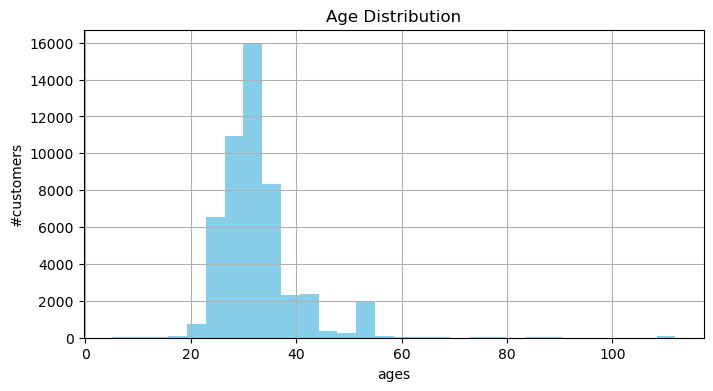

In [ ]:
#Customer Age Distribution
plt.figure(figsize=(8,4))
df_cus['age'].hist(bins = 30, color='skyblue')
plt.title('Age distribution')
plt.xlabel('ages')
plt.ylabel('#customers')


Text(0, 0.5, '#customers')

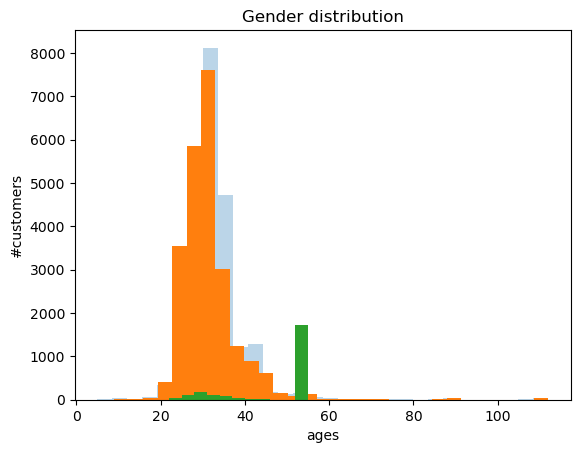

In [ ]:
#Customer Gender Distribution
##data
male_age = df_cus[df_cus['usergender'] == 'Male']['age']
female_age = df_cus['age'][df_cus['usergender'] == 'Female']
unknown_age = df_cus['age'][df_cus['usergender'] == 'Not verify']

##plot
plt.hist(male_age, bins=30, alpha = 0.3, color='skyblue', label='Male')
plt.hist(female_age, bins=30, alpha = 0.3, color='salmon', label='Female')
plt.hist(unknown_age, bins=30, alpha = 0.3, color='limegreen', label='Not Verify')

##edit
plt.title('Gender distribution')
plt.xlabel('ages')
plt.ylabel('#customers')
                            